# selenium 라이브러리
1. 웹 어플리케이션 테스트를 위한 라이브러리
2. python에서 웹 브라우져를 제어하는 기능
3. 웹드라이버를 별도 설치

인터넷에 웹드라이버 라고 치면 WebDriver for Chrome download

ChromeDriver 111.0.5563.64 <- 크롬브라우저에 설정-크롬정보에 내 버전보고

chromedriver_win32.zip로 다운 64버전이 없어서

zip 풀고 chromedriver.exe만 여기 옆에 파일 탐색기 2023PRAC 폴더에 옮김

In [1]:
# 라이브러리 설치
!pip install selenium

     ---------------------------------------- 6.5/6.5 MB 92.2 kB/s eta 0:00:00
     ------------------------------------- 384.9/384.9 kB 51.7 kB/s eta 0:00:00
     --------------------------------------- 60.0/60.0 kB 59.0 kB/s eta 0:00:00
     --------------------------------------- 58.3/58.3 kB 66.9 kB/s eta 0:00:00


In [2]:
#라이브러리 로드
from selenium import webdriver

In [3]:
# 웹 드라이버 파일의 위치 지정
path = "../chromedriver.exe"

In [4]:
# 웹 드라이버 실행
driver = webdriver.Chrome(path)

c:\Python 3.7.1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


In [5]:
# 웹 주소창에 값을 입력
driver.get('https://www.naver.com')

뜬 네이버 검색창에 코드가 id="query"는 고유하다라는 뜻

In [6]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [7]:
# 검색어창 지정
element = driver.find_element(By.ID, 'query') #태그 하나하나가 element


In [8]:
# element에 입력할 값을 지정
element.send_keys("날씨") #웹 브라우저에 날씨가 입력됨

In [10]:
#엔터치기
element.send_keys(Keys.ENTER)

In [11]:
from bs4 import BeautifulSoup as bs

In [12]:
soup = bs(driver.page_source, 'html.parser')

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/111.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="날씨 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'날씨'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>날씨 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.p
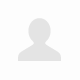
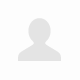

In [23]:
print(soup) # 지금 보고 있는 페이지의 html 코드

In [24]:
data = soup.find('ul', attrs={
    'class': 'list_news'
}) # 나오는 뉴스 전체
data

<ul class="list_news"> <li class="bx" id="sp_nws_all1"> <div class="news_wrap api_ani_send"> <div class="news_area"> <div class="news_info"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://www.yna.co.kr/view/AKR20230410129351081?input=1195m" href="#" onclick="tCR('a=nws_all*h.kep&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=nws_all*h.kepoff&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u=javascript" data-cr-on="a=nws_all*h.kepon&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=nws_all*h.kephome&amp;r=1&amp;i=880000D8_000000000000000013871551&amp;u='+urlencode(this.href))

In [25]:
_list = data.find_all('a', attrs={
    'class': 'news_tit'
})

In [26]:
result = []
for i in _list:
    result.append(i.get_text())
result

['프랑스 몽블랑 눈사태로 6명 사망…"따뜻해진 날씨 영향일 수도"(종합)',
 "오늘의 날씨, 비온 뒤 기온 뚝…미세먼지 '나쁨'",
 "아침부터 '황사비'에 돌풍…수도권 미세먼지 '매우나쁨'[내일날씨]",
 "[오늘의 날씨] 황사 덮쳐 미세먼지 '나쁨'…전국 잠시 '흙비'"]

In [47]:
driver=webdriver.Chrome(path)
code = "005380" #현대차
driver.get('https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd='+code)
# 네이버증권 f12에서 
# <iframe id="coinfo_cp" title="종목분석 영역" src="https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=005380" width="680" height="2500" marginheight="0" bottommargin="0" topmargin="0" scrolling="no" frameborder="0" style="height: 3973px;"></iframe>
# 이 부분에서 가져옴 iframe은 iframe에 있는 주소에서 해야된다하심

c:\Python 3.7.1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [48]:
element = driver.find_element(By.CLASS_NAME, 'menu')
element
# search_element.click() #엔터가 아닌 버튼 누르기 방식

<selenium.webdriver.remote.webelement.WebElement (session="bc580eb71624a7e32f89b659d409d162", element="3dad71bc-4728-4e9e-bec4-828ac0cb2e9b")>

In [49]:
element2 = element.find_elements(By.TAG_NAME, 'a')[3] #4번째꺼
#만약 class가 'tabs_submenu tab_total_submenu'일 때 두개로 생각해서 'tabs_submenu' 따로 하기
element2.click() #엔터가 아닌 버튼 누르기 방식

In [50]:

soup = bs(driver.page_source, 'html.parser')

In [54]:
data = soup.find_all('table', attrs={
    'class' : 'gHead01 all-width data-list'
})[1] #같은 클래스명 두개. 그중 두번째 테이블

In [56]:
# 컬럼 부분에 들어갈 값을 추출
_list = data.find_all('th')

In [57]:
col_list =[]
for i in _list:
    col_list.append(i.get_text())
col_list

['항목',
 '\n2018/12(IFRS연결)\n',
 '\n2019/12(IFRS연결)\n',
 '\n2020/12(IFRS연결)\n',
 '\n2021/12(IFRS연결)\n',
 '\n2022/12(IFRS연결)\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t연간컨센서스보기\n\n',
 '\n2023/12(E)(IFRS연결)\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t\t연간컨센서스닫기\n\n',
 '\n전년대비(YoY)\n',
 '\n전년대비(YoY)\n']

In [59]:
# value 값을 추출
data2 = data.find('tbody')

In [62]:
data3 = data2.find_all('tr')

In [63]:
data3[0].find_all('td')

[<td class="txt" title="EPS">
 <span class="cut">
 <a class="btn_moreE" data-acc="312000"><span class="icon-sprite icon-moreE">펼치기</span></a>
 														
 												EPS
 													</span>
 </td>,
 <td class="num ext0">5,352</td>,
 <td class="num ext1">10,761</td>,
 <td class="num ext2">5,143</td>,
 <td class="num ext3">17,846</td>,
 <td class="num ext4">26,592</td>,
 <td class="num ext5">31,707</td>,
 <td class="num ext6 noline-right">49</td>,
 <td class="num ext7 noline-right">19</td>]

In [66]:
value_list = []

for i in data3:
    sample_list =[]
    _list = i.find_all('td')
    for j in _list:
        sample_list.append(j.get_text())
    value_list.append(sample_list)

value_list

[['\n\n펼치기\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\tEPS\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '5,352',
  '10,761',
  '5,143',
  '17,846',
  '26,592',
  '31,707',
  '49',
  '19'],
 ['\n\n\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t당기순이익(지배)＜당기＞\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '15,080.8',
  '29,800.5',
  '14,244.4',
  '49,423.6',
  '73,643.6',
  '87,009.1',
  '\xa0',
  '\xa0'],
 ['\n\n\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t보통주수정평균발행주식수＜당기＞\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '217,415,903',
  '213,668,187',
  '213,668,187',
  '213,668,187',
  '213,668,187',
  '211,724,685',
  '\xa0',
  '\xa0'],
 ['\n\n\xa0\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t우선주수정평균발행주식수＜당기＞\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '64,366,142',
  '63,270,871',
  '63,270,871',
  '63,270,871',
  '63,270,871',
  '62,695,368',
  '\xa0',
  '\xa0'],
 ['\n\n펼치기\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\tBPS\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n',
  '256,422',
  '267